In [1]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd
import moviepy.editor as mpy

In [2]:
# Load the image
gambar_path = "C:/Users/aqilw/Paramarta.AI/Achmad Fauzi Wongsojudo/Images/Image 1.JPG"
gambar = cv2.imread(gambar_path)
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

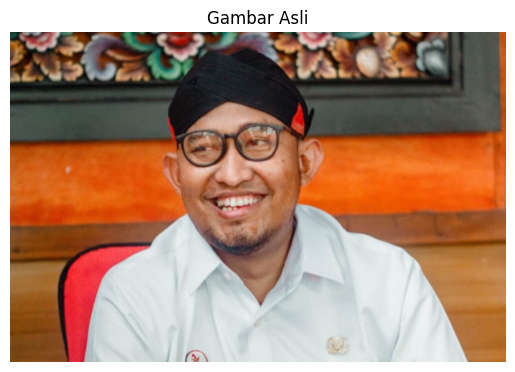

In [3]:
# Display the original image
plt.imshow(gambar_rgb)
plt.axis('off')
plt.title("Gambar Asli")
plt.show()

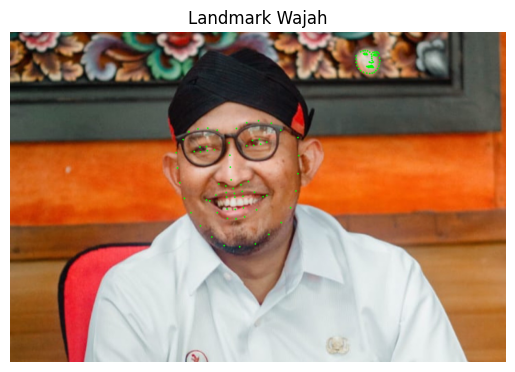

In [4]:
# Load Dlib's pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
shape_predictor_path = "shape_predictor_68_face_landmarks.dat"
if not os.path.exists(shape_predictor_path):
    raise FileNotFoundError(f"File {shape_predictor_path} tidak ditemukan. Pastikan file tersebut berada di lokasi yang benar.")

predictor = dlib.shape_predictor(shape_predictor_path)

# Deteksi wajah dan landmark wajah
detections = detector(gambar, 1)
for detection in detections:
    shape = predictor(gambar, detection)
    for i in range(68):
        x, y = shape.part(i).x, shape.part(i).y
        cv2.circle(gambar_rgb, (x, y), 2, (0, 255, 0), -1)

# Display the image with landmarks
plt.imshow(gambar_rgb)
plt.axis('off')
plt.title("Landmark Wajah")
plt.show()

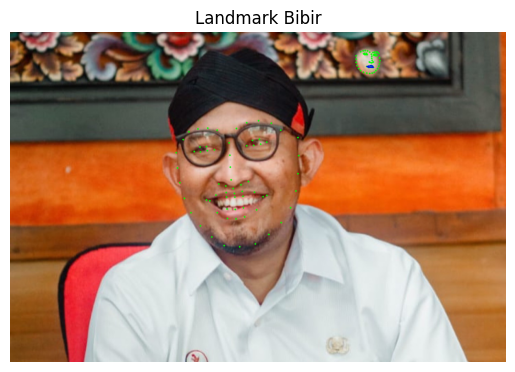

In [5]:
# Extract lip landmarks (points 48-67)
lip_points = np.array([(shape.part(i).x, shape.part(i).y) for i in range(48, 68)])
lip_hull = cv2.convexHull(lip_points)

# Draw the lip area
gambar_lip = gambar_rgb.copy()
cv2.drawContours(gambar_lip, [lip_hull], -1, (0, 0, 255), 2)

# Display the image with lip landmarks
plt.imshow(gambar_lip)
plt.axis('off')
plt.title("Landmark Bibir")
plt.show()

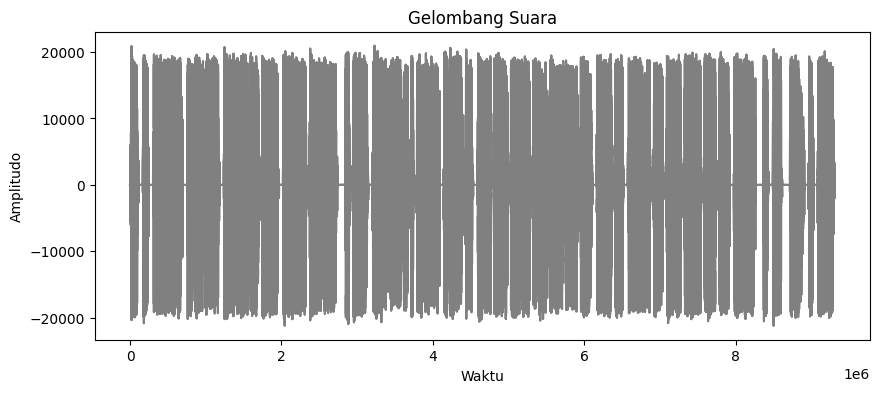

In [6]:
# Load the audio file
audio_path = "C:/Users/aqilw/Paramarta.AI/Achmad Fauzi Wongsojudo/project-1/Project 1 Ind V3.wav"  # Ganti dengan path ke file audio Anda
if not os.path.exists(audio_path):
    raise FileNotFoundError(f"File {audio_path} tidak ditemukan. Pastikan file tersebut berada di lokasi yang benar.")

# Read the audio file
sample_rate, audio_data = wavfile.read(audio_path)

# Display the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(audio_data, color='gray')
plt.title("Gelombang Suara")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.show()

In [7]:
# Create a simple lip animation based on audio amplitude
lip_movement = (audio_data - np.min(audio_data)) / (np.max(audio_data) - np.min(audio_data))  # Normalisasi amplitudo
lip_movement = lip_movement.astype(np.float64)  # Ensure lip_movement is float for scaling

# Generate frames for lip movement
frames = []
num_frames = len(lip_movement) // 1000  # Reduce the number of frames for better performance
for i in range(num_frames):
    frame = gambar_rgb.copy()
    scale = 1 + 0.1 * float(lip_movement[i * 1000])  # Skala lip movement berdasarkan amplitudo audio
    scaled_lip_points = np.array([(int(x * scale), int(y * scale)) for (x, y) in lip_points], dtype=np.int32)
    if len(scaled_lip_points) > 1:  # Ensure there are enough points for convex hull
        lip_hull = cv2.convexHull(scaled_lip_points)
        cv2.drawContours(frame, [lip_hull], -1, (0, 0, 255), 2)
    frames.append(frame)

# Create an animation from the frames
clip = mpy.ImageSequenceClip([cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in frames], fps=24)
clip.write_videofile("lip_sync_animation.mp4", codec='libx264')

# Display the resulting video
ipd.display(ipd.Video("lip_sync_animation.mp4"))


TypeError: only length-1 arrays can be converted to Python scalars